# Sales Data Analysis


In [44]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix
import os

In [4]:
df=pd.read_csv("combined_data.csv")
del df['Unnamed: 0']
df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,295665,Macbook Pro Laptop,1,1700,12/30/19 00:01,"136 Church St, New York City, NY 10001"
1,295666,LG Washing Machine,1,600.0,12/29/19 07:03,"562 2nd St, New York City, NY 10001"
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001"
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016"
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301"
...,...,...,...,...,...,...
186845,222905,AAA Batteries (4-pack),1,2.99,06/07/19 19:02,"795 Pine St, Boston, MA 02215"
186846,222906,27in FHD Monitor,1,149.99,06/01/19 19:29,"495 North St, New York City, NY 10001"
186847,222907,USB-C Charging Cable,1,11.95,06/22/19 18:57,"319 Ridge St, San Francisco, CA 94016"
186848,222908,USB-C Charging Cable,1,11.95,06/26/19 18:35,"916 Main St, San Francisco, CA 94016"


In [5]:
#dChecking for NaN values
df.isna().sum()
#dropping NaN values
df=df.dropna(how="all")
df.isna().sum()

,0
Order ID,0
Product,0
Quantity Ordered,0
Price Each,0
Order Date,0
Purchase Address,0


In [6]:
#Replacing the space in column name with underscore and changing the case
df.columns
df.columns=[x for x in df.columns.str.replace(" ","_").str.lower()]
df

,order_id,product,quantity_ordered,price_each,order_date,purchase_address
0,295665,Macbook Pro Laptop,1,1700,12/30/19 00:01,"136 Church St, New York City, NY 10001"
1,295666,LG Washing Machine,1,600.0,12/29/19 07:03,"562 2nd St, New York City, NY 10001"
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001"
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016"
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301"
...,...,...,...,...,...,...
186845,222905,AAA Batteries (4-pack),1,2.99,06/07/19 19:02,"795 Pine St, Boston, MA 02215"
186846,222906,27in FHD Monitor,1,149.99,06/01/19 19:29,"495 North St, New York City, NY 10001"
186847,222907,USB-C Charging Cable,1,11.95,06/22/19 18:57,"319 Ridge St, San Francisco, CA 94016"
186848,222908,USB-C Charging Cable,1,11.95,06/26/19 18:35,"916 Main St, San Francisco, CA 94016"


In [7]:
df["month"]=df["order_date"].apply(lambda x: x.split("/")[0])
df

/tmp/ipython-input-1448383343.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["month"]=df["order_date"].apply(lambda x: x.split("/")[0])


,order_id,product,quantity_ordered,price_each,order_date,purchase_address,month
0,295665,Macbook Pro Laptop,1,1700,12/30/19 00:01,"136 Church St, New York City, NY 10001",12
1,295666,LG Washing Machine,1,600.0,12/29/19 07:03,"562 2nd St, New York City, NY 10001",12
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001",12
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016",12
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301",12
...,...,...,...,...,...,...,...
186845,222905,AAA Batteries (4-pack),1,2.99,06/07/19 19:02,"795 Pine St, Boston, MA 02215",06
186846,222906,27in FHD Monitor,1,149.99,06/01/19 19:29,"495 North St, New York City, NY 10001",06
186847,222907,USB-C Charging Cable,1,11.95,06/22/19 18:57,"319 Ridge St, San Francisco, CA 94016",06
186848,222908,USB-C Charging Cable,1,11.95,06/26/19 18:35,"916 Main St, San Francisco, CA 94016",06


In [8]:
df["month"].unique()

array(['12', 'Order Date', '01', '04', '05', '02', '03', '08', '09', '06',
       '11', '10', '07'], dtype=object)

In [9]:
#dropping the record where the month is order date
filt=df["month"]=="Order Date"
df=df[~filt]

## Analysing the best month for sale

In [10]:
#changing the dtype to int
df["month"]=df["month"].astype(int)
df["price_each"]=df["price_each"].astype(float)
df["quantity_ordered"]=df["quantity_ordered"].astype(int)
df.dtypes

/tmp/ipython-input-399955659.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["month"]=df["month"].astype(int)
/tmp/ipython-input-399955659.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["price_each"]=df["price_each"].astype(float)
/tmp/ipython-input-399955659.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable

,0
order_id,object
product,object
quantity_ordered,int64
price_each,float64
order_date,object
purchase_address,object
month,int64


In [11]:
df["sales"]=df["price_each"]*df["quantity_ordered"]

/tmp/ipython-input-1801550866.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["sales"]=df["price_each"]*df["quantity_ordered"]


In [12]:
month_grp=df.groupby("month")

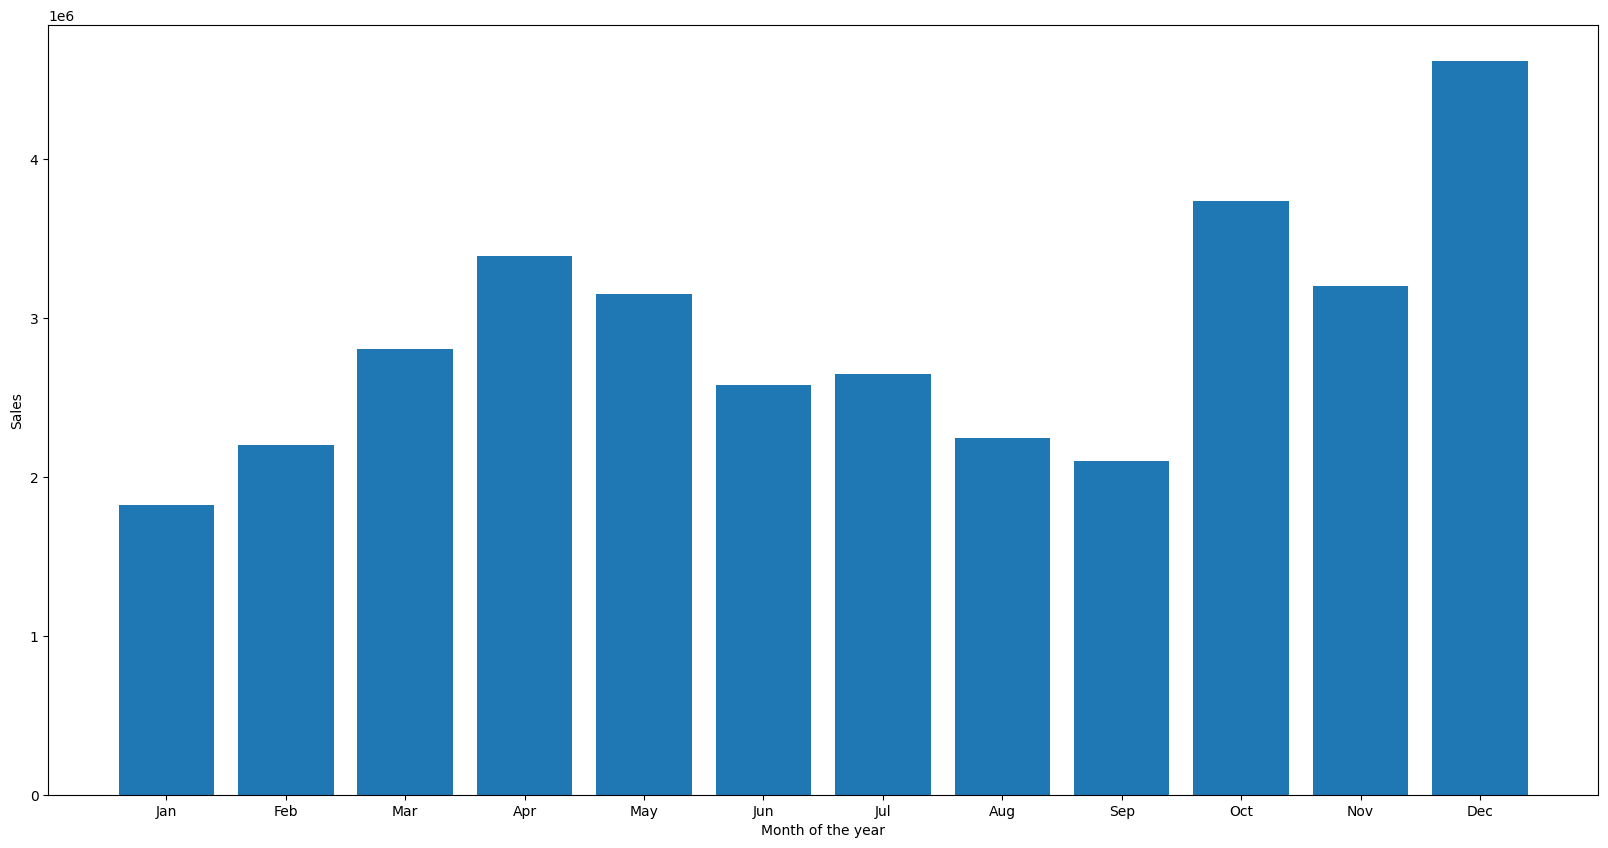

In [16]:
month_name=["Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sep","Oct","Nov","Dec"]
month_no=np.arange(1,13)
plt.figure(figsize=(20,10))
plt.bar(month_no,month_grp["sales"].sum())
plt.xticks(month_no,month_name)
plt.xlabel("Month of the year")
plt.ylabel("Sales")
plt.show()

## Analysing which city has the maximum orders

In [17]:
df["city"]=df["purchase_address"].apply(lambda x:x.split(",")[1])

/tmp/ipython-input-1121462174.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["city"]=df["purchase_address"].apply(lambda x:x.split(",")[1])


Text(0, 0.5, 'Number of Orders')

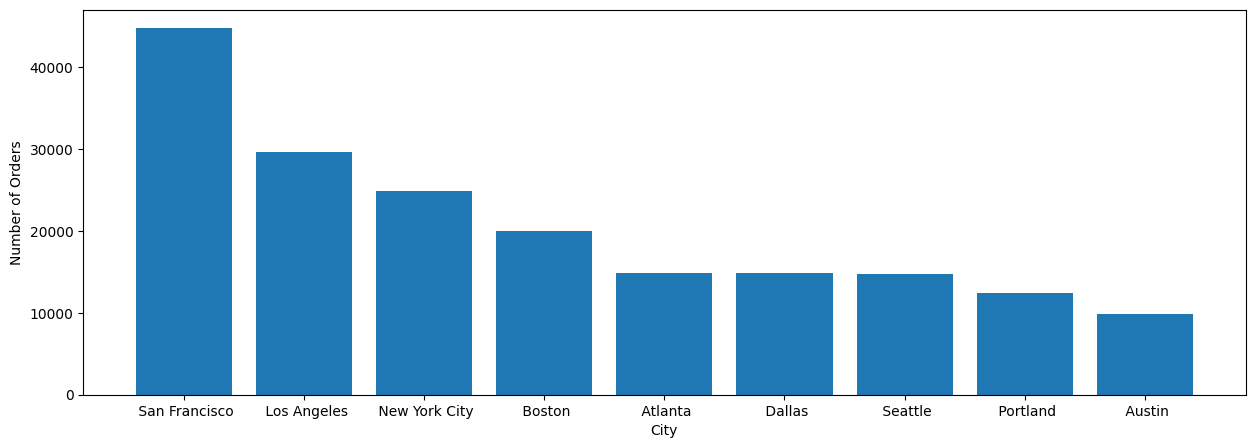

In [18]:
plt.figure(figsize=(15,5))
plt.bar(df["city"].value_counts().index,df["city"].value_counts())
plt.xlabel("City")
plt.ylabel("Number of Orders")

## Analysing the time when sales are maximum

In [19]:
df["Hour"]=pd.to_datetime(df["order_date"]).dt.hour
df

/tmp/ipython-input-4199083932.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df["Hour"]=pd.to_datetime(df["order_date"]).dt.hour
/tmp/ipython-input-4199083932.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Hour"]=pd.to_datetime(df["order_date"]).dt.hour


,order_id,product,quantity_ordered,price_each,order_date,purchase_address,month,sales,city,Hour
0,295665,Macbook Pro Laptop,1,1700.00,12/30/19 00:01,"136 Church St, New York City, NY 10001",12,1700.00,New York City,0
1,295666,LG Washing Machine,1,600.00,12/29/19 07:03,"562 2nd St, New York City, NY 10001",12,600.00,New York City,7
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001",12,11.95,New York City,18
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016",12,149.99,San Francisco,15
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301",12,11.95,Atlanta,12
...,...,...,...,...,...,...,...,...,...,...
186845,222905,AAA Batteries (4-pack),1,2.99,06/07/19 19:02,"795 Pine St, Boston, MA 02215",6,2.99,Boston,19
186846,222906,27in FHD Monitor,1,149.99,06/01/19 19:29,"495 North St, New York City, NY 10001",6,149.99,New York City,19
186847,222907,USB-C Charging Cable,1,11.95,06/22/19 18:57,"319 Ridge St, San Francisco, CA 94016",6,11.95,San Francisco,18
186848,222908,USB-C Charging Cable,1,11.95,06/26/19 18:35,"916 Main St, San Francisco, CA 94016",6,11.95,San Francisco,18


([<matplotlib.axis.XTick at 0x7c444ba0c4a0>,
 [Text(0, 0, '0'),
  Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5'),
  Text(6, 0, '6'),
  Text(7, 0, '7'),
  Text(8, 0, '8'),
  Text(9, 0, '9'),
  Text(10, 0, '10'),
  Text(11, 0, '11'),
  Text(12, 0, '12'),
  Text(13, 0, '13'),
  Text(14, 0, '14'),
  Text(15, 0, '15'),
  Text(16, 0, '16'),
  Text(17, 0, '17'),
  Text(18, 0, '18'),
  Text(19, 0, '19'),
  Text(20, 0, '20'),
  Text(21, 0, '21'),
  Text(22, 0, '22'),
  Text(23, 0, '23')])

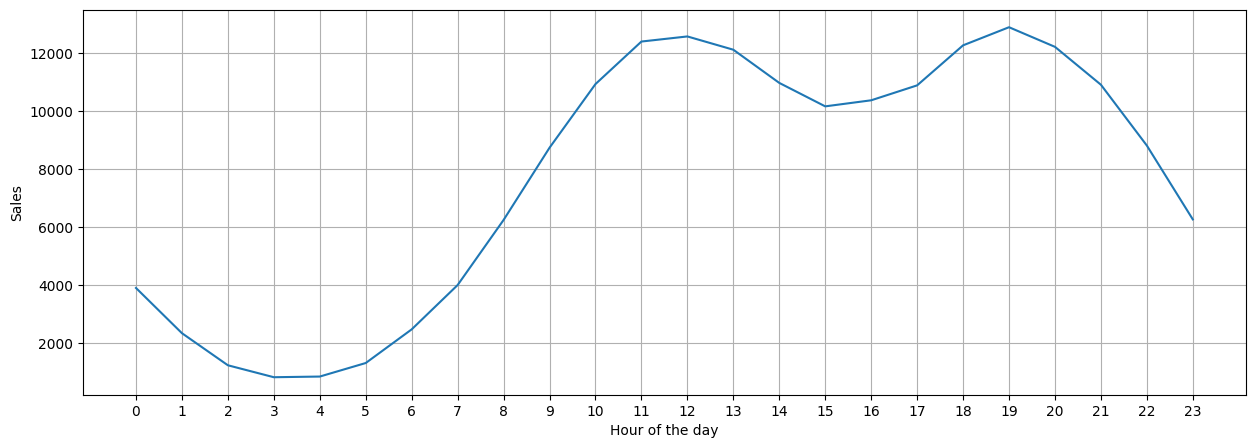

In [21]:
plt.figure(figsize=(15,5))
plt.grid()
plt.xlabel("Hour of the day")
plt.ylabel("Sales")
plt.plot(df.groupby("Hour").size().index,df.groupby("Hour").size())
plt.xticks(np.arange(24))

## Analysing which product is sold the most

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18],
 [Text(0, 0, '20in Monitor'),
  Text(1, 0, '27in 4K Gaming Monitor'),
  Text(2, 0, '27in FHD Monitor'),
  Text(3, 0, '34in Ultrawide Monitor'),
  Text(4, 0, 'AA Batteries (4-pack)'),
  Text(5, 0, 'AAA Batteries (4-pack)'),
  Text(6, 0, 'Apple Airpods Headphones'),
  Text(7, 0, 'Bose SoundSport Headphones'),
  Text(8, 0, 'Flatscreen TV'),
  Text(9, 0, 'Google Phone'),
  Text(10, 0, 'LG Dryer'),
  Text(11, 0, 'LG Washing Machine'),
  Text(12, 0, 'Lightning Charging Cable'),
  Text(13, 0, 'Macbook Pro Laptop'),
  Text(14, 0, 'ThinkPad Laptop'),
  Text(15, 0, 'USB-C Charging Cable'),
  Text(16, 0, 'Vareebadd Phone'),
  Text(17, 0, 'Wired Headphones'),
  Text(18, 0, 'iPhone')])

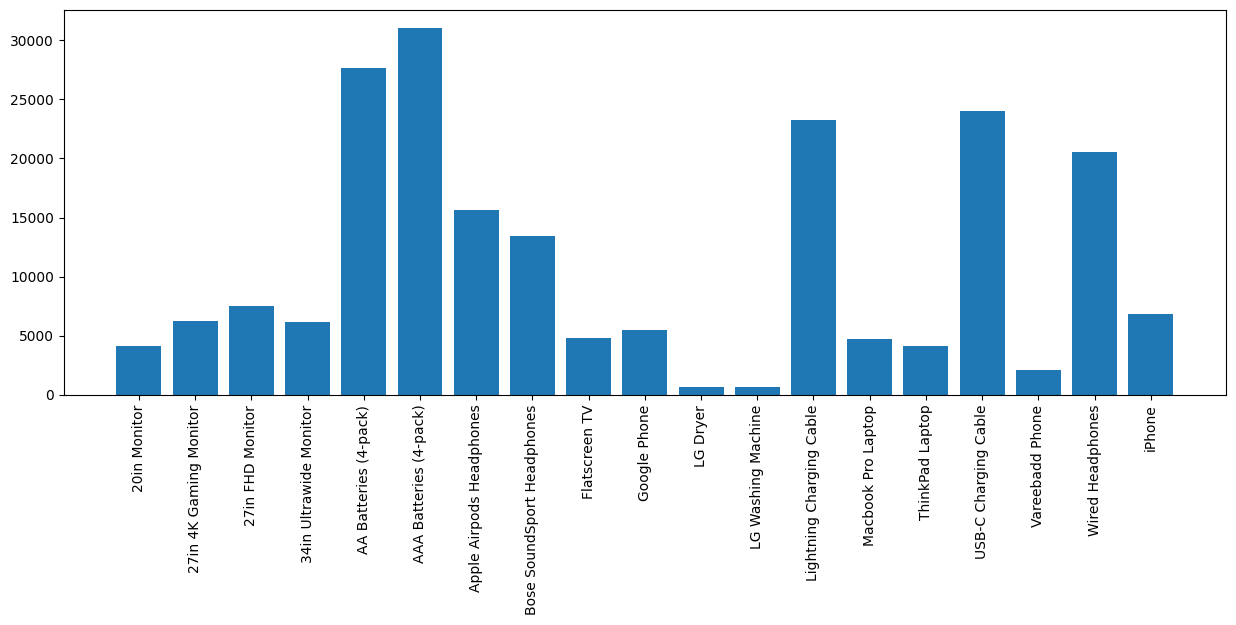

In [22]:
plt.figure(figsize=(15,5))
product_grp=df.groupby("product")
plt.bar(product_grp["quantity_ordered"].sum().index,product_grp["quantity_ordered"].sum())
plt.xticks(rotation=90)

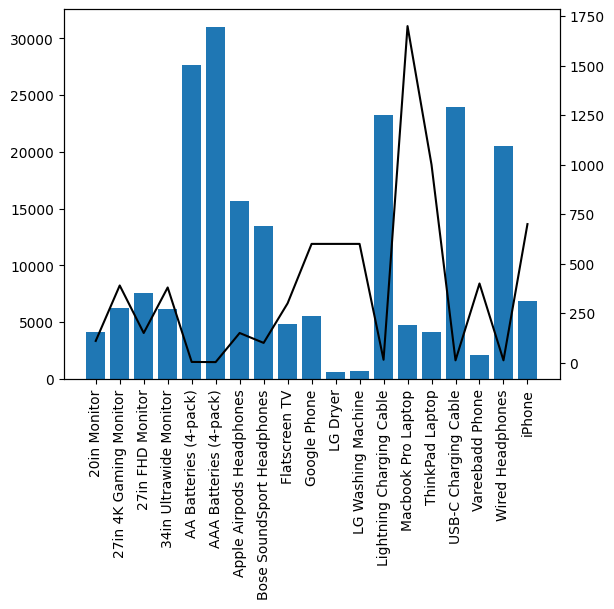

In [23]:
products = product_grp["quantity_ordered"].sum().index
quantity = product_grp["quantity_ordered"].sum()
price= product_grp["price_each"].mean()
fig,ax1=plt.subplots()
ax2=ax1.twinx()
ax1.bar(products,quantity)
ax2.plot(products,price,color="k")
ax1.tick_params(axis='x',labelrotation =90)

## Analysing the products that are most often sold together

In [24]:
dupl_filt=df["order_id"].duplicated(keep=False)
df_dup=df[dupl_filt]
df_dup

,order_id,product,quantity_ordered,price_each,order_date,purchase_address,month,sales,city,Hour
16,295681,Google Phone,1,600.00,12/25/19 12:37,"79 Elm St, Boston, MA 02215",12,600.00,Boston,12
17,295681,USB-C Charging Cable,1,11.95,12/25/19 12:37,"79 Elm St, Boston, MA 02215",12,11.95,Boston,12
18,295681,Bose SoundSport Headphones,1,99.99,12/25/19 12:37,"79 Elm St, Boston, MA 02215",12,99.99,Boston,12
19,295681,Wired Headphones,1,11.99,12/25/19 12:37,"79 Elm St, Boston, MA 02215",12,11.99,Boston,12
36,295698,Vareebadd Phone,1,400.00,12/13/19 14:32,"175 1st St, New York City, NY 10001",12,400.00,New York City,14
...,...,...,...,...,...,...,...,...,...,...
186820,222882,AA Batteries (4-pack),1,3.84,06/18/19 11:37,"990 Walnut St, Los Angeles, CA 90001",6,3.84,Los Angeles,11
186822,222884,Google Phone,1,600.00,06/04/19 12:06,"819 Pine St, New York City, NY 10001",6,600.00,New York City,12
186823,222884,USB-C Charging Cable,1,11.95,06/04/19 12:06,"819 Pine St, New York City, NY 10001",6,11.95,New York City,12
186842,222903,iPhone,1,700.00,06/07/19 22:21,"685 Hickory St, New York City, NY 10001",6,700.00,New York City,22


In [25]:
df_dup["grouped_products"]=df_dup.groupby("order_id")["product"].transform(lambda x: ",".join(x))

/tmp/ipython-input-1952219798.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dup["grouped_products"]=df_dup.groupby("order_id")["product"].transform(lambda x: ",".join(x))


In [26]:
df_dup

,order_id,product,quantity_ordered,price_each,order_date,purchase_address,month,sales,city,Hour,grouped_products
16,295681,Google Phone,1,600.00,12/25/19 12:37,"79 Elm St, Boston, MA 02215",12,600.00,Boston,12,"Google Phone,USB-C Charging Cable,Bose SoundSp..."
17,295681,USB-C Charging Cable,1,11.95,12/25/19 12:37,"79 Elm St, Boston, MA 02215",12,11.95,Boston,12,"Google Phone,USB-C Charging Cable,Bose SoundSp..."
18,295681,Bose SoundSport Headphones,1,99.99,12/25/19 12:37,"79 Elm St, Boston, MA 02215",12,99.99,Boston,12,"Google Phone,USB-C Charging Cable,Bose SoundSp..."
19,295681,Wired Headphones,1,11.99,12/25/19 12:37,"79 Elm St, Boston, MA 02215",12,11.99,Boston,12,"Google Phone,USB-C Charging Cable,Bose SoundSp..."
36,295698,Vareebadd Phone,1,400.00,12/13/19 14:32,"175 1st St, New York City, NY 10001",12,400.00,New York City,14,"Vareebadd Phone,USB-C Charging Cable"
...,...,...,...,...,...,...,...,...,...,...,...
186820,222882,AA Batteries (4-pack),1,3.84,06/18/19 11:37,"990 Walnut St, Los Angeles, CA 90001",6,3.84,Los Angeles,11,"Apple Airpods Headphones,AA Batteries (4-pack)"
186822,222884,Google Phone,1,600.00,06/04/19 12:06,"819 Pine St, New York City, NY 10001",6,600.00,New York City,12,"Google Phone,USB-C Charging Cable"
186823,222884,USB-C Charging Cable,1,11.95,06/04/19 12:06,"819 Pine St, New York City, NY 10001",6,11.95,New York City,12,"Google Phone,USB-C Charging Cable"
186842,222903,iPhone,1,700.00,06/07/19 22:21,"685 Hickory St, New York City, NY 10001",6,700.00,New York City,22,"iPhone,Lightning Charging Cable"


In [27]:
df_dup=df_dup.drop_duplicates(subset=["order_id"])

In [28]:
ser=df_dup["grouped_products"].value_counts()[0:6]

([<matplotlib.patches.Wedge at 0x7c444c205370>,
 [Text(0.6632224691176637, 0.8775739037012609, 'iPhone,Lightning Charging Cable'),
  Text(-1.014049468803516, 0.4262671402058894, 'Google Phone,USB-C Charging Cable'),
  Text(-0.7038256945706146, -0.8453575525552439, 'iPhone,Wired Headphones'),
  Text(0.011518805505115021, -1.0999396879464507, 'Vareebadd Phone,USB-C Charging Cable'),
  Text(0.6696376762350917, -0.872688594268578, 'Google Phone,Wired Headphones'),
  Text(1.0510329127572136, -0.32454555350688097, 'iPhone,Apple Airpods Headphones')],
 [Text(0.3617577104278165, 0.47867667474614223, '29.4%'),
  Text(-0.553117892074645, 0.23250934920321237, '28.5%'),
  Text(-0.3839049243112443, -0.46110411957558756, '12.0%'),
  Text(0.00628298482097183, -0.5999671025162457, '10.4%'),
  Text(0.36525691431005, -0.4760119605101334, '10.1%'),
  Text(0.5732906796857528, -0.1770248473673896, '9.5%')])

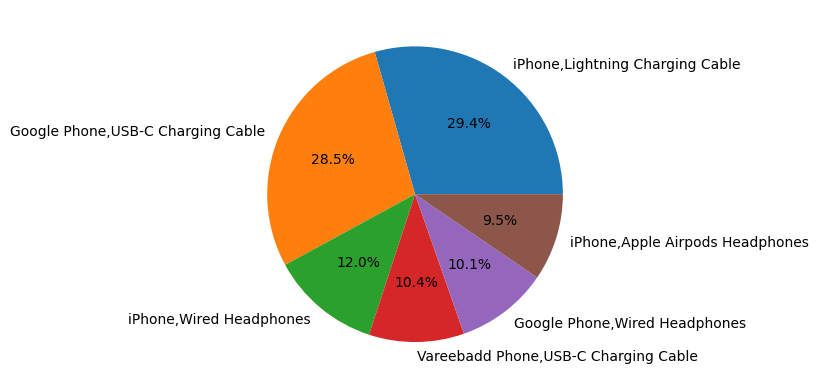

In [29]:
plt.pie(ser,labels=ser.index,autopct="%1.1f%%")

#ML model

## Prepare Data for ML


In [33]:
df_ml = df[['month', 'Hour', 'city', 'quantity_ordered', 'price_each', 'product']].copy()

# Label encoded 'product'
le = LabelEncoder()
df_ml['product'] = le.fit_transform(df_ml['product'])

# One-hot encoded 'city'
ohe = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
city_encoded = ohe.fit_transform(df_ml[['city']])

city_df = pd.DataFrame(city_encoded, columns=ohe.get_feature_names_out(['city']), index=df_ml.index)

df_ml = pd.concat([df_ml.drop('city', axis=1), city_df], axis=1)

df_ml.head()

,month,Hour,quantity_ordered,price_each,product,city_ Atlanta,city_ Austin,city_ Boston,city_ Dallas,city_ Los Angeles,city_ New York City,city_ Portland,city_ San Francisco,city_ Seattle
0,12,0,1,1700.00,13,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,12,7,1,600.00,11,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,12,18,1,11.95,15,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,12,15,1,149.99,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,12,12,1,11.95,15,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [36]:
X = df_ml.drop('product', axis=1)
y = df_ml['product']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (130165, 13)
Shape of X_test: (55785, 13)
Shape of y_train: (130165,)
Shape of y_test: (55785,)


##Train model

In [38]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [41]:
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")

Accuracy: 0.9629
Precision: 0.9619


## Visualize Predictions

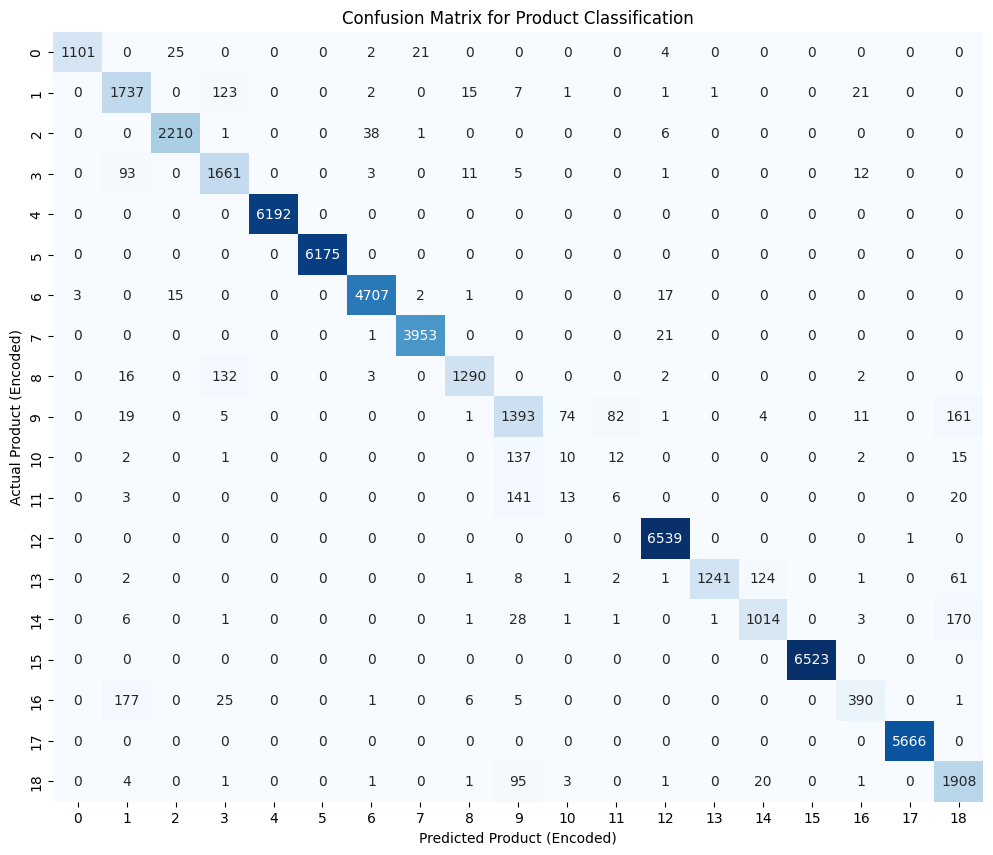

In [46]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(12, 10))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Product (Encoded)')
plt.ylabel('Actual Product (Encoded)')
plt.title('Confusion Matrix for Product Classification')
plt.show()